## Class 03: Statistics, KNN, MNIST¶

 * Generating dataset
 * Visualizing distributions, covariance mat
 * Implementing KNN
 * KNN on MNIST

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [72]:
mean_1 = np.array([2, 3])

covar_1 = np.array([[1, 0], [ 0, 1]])

data_1 = np.random.multivariate_normal(mean_1, covar_1, 1000)

In [24]:
data_1.shape

(1000, 2)

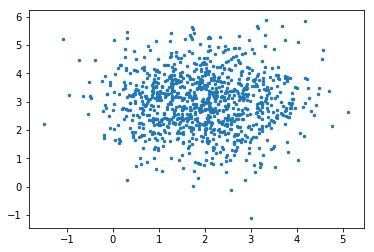

In [73]:
plt.scatter(data_1[:, 0], data_1[:, 1], s=6)



In [28]:
print(np.mean(data_1[:,0]))

1.9356088091940993


In [74]:
mean_2 = np.array([10, 10])

covar_2 = np.array([[1, 0], [ 0, 1]])

data_2 = np.random.multivariate_normal(mean_2, covar_2, 1000)

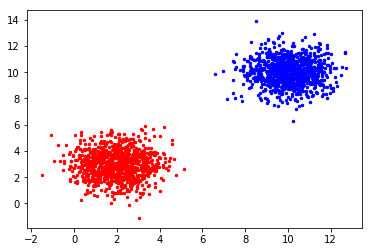

In [75]:
plt.scatter(data_1[:, 0], data_1[:, 1], s=6, color="red")
plt.scatter(data_2[:, 0], data_2[:, 1], s=6, color = "blue")


In [34]:
data = np.zeros([2000, 3])

In [39]:
data[:1000, 1:3] = data_1
data[:1000, 0] = 1

In [40]:
data[1000:, 1:3] = data_2
data[1000:, 0] = 2

In [41]:
print(data)

[[ 1.          2.10244526  4.81039613]
 [ 1.          2.14321318  3.42833887]
 [ 1.          1.01368615  2.82826359]
 ...
 [ 2.         10.23796595 11.28416057]
 [ 2.          9.28360445  9.89078784]
 [ 2.         11.03216376  9.89180894]]


In [69]:
def eu_distance(x1, x2) :
    return math.sqrt(np.sum((x1-x2) ** 2))

def knn(X_train, Y_train, test, k=5):
    
    dists = list()
    
    for x, y in zip(X_train, Y_train):
        d = eu_distance(x, test)
        dists.append((d, y))
    
    dists = sorted(dists, key=lambda k : k[0])
    
    nbrs = np.array(dists[:k])
    
    items, freq = np.unique(nbrs[:, 1], return_counts=True)
    
    vote = items[freq.argmax()]
    
    return vote
    


In [67]:
x1 = np.array([0, 0, 0])
x2 = np.array([0, 2, 2])

print(eu_distance(x1, x2))

2.8284271247461903


In [65]:
a = list()

a.append((5, 4))
a.append((2, 5))
a.append((6, 1))

print(a)

l = lambda x1 : x1[1]

s = sorted(a, key=l)

print(s)




[(5, 4), (2, 5), (6, 1)]
[(6, 1), (5, 4), (2, 5)]


In [71]:
X_train = data[:, 1:]
Y_train = data[:, 0]
test = np.array([8, 8])

vote = knn(X_train, Y_train, test)

print(vote)

2.0
